# SQLite Database Analysis and Visualization

This notebook demonstrates:
1. Creating and populating a SQLite database
2. Running SQL queries
3. Loading data into pandas
4. Visualizing results with matplotlib

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

## Create and Populate Database

We'll create a sales database with 40 rows and multiple columns including:
- product_id
- product_name
- category
- quantity
- price
- sale_date
- customer_region

In [2]:
# Create database connection
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product_id INTEGER,
    product_name TEXT,
    category TEXT,
    quantity INTEGER,
    price REAL,
    sale_date DATE,
    customer_region TEXT
)''')

# Sample data
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Monitor']
categories = ['Electronics', 'Mobile', 'Electronics', 'Accessories', 'Electronics']
regions = ['North', 'South', 'East', 'West', 'Central']

# Generate 40 random sales records
base_date = datetime(2025, 1, 1)
sales_data = []

for i in range(40):
    product_idx = i % len(products)
    sale_date = base_date + timedelta(days=i)
    sales_data.append((
        i + 1,  # product_id
        products[product_idx],  # product_name
        categories[product_idx],  # category
        np.random.randint(1, 10),  # quantity
        np.random.uniform(100, 1000),  # price
        sale_date.strftime('%Y-%m-%d'),  # sale_date
        np.random.choice(regions)  # customer_region
    ))

# Insert data
cursor.executemany('INSERT INTO sales VALUES (?,?,?,?,?,?,?)', sales_data)
conn.commit()

print('Database created and populated with 40 rows')

Database created and populated with 40 rows


## Query and Analyze Sales Data

Let's analyze the sales data by product, calculating total quantity and revenue

In [3]:
# Create and execute query
query = """
SELECT 
    product_name as product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product_name
ORDER BY revenue DESC
"""

# Load into pandas
df = pd.read_sql_query(query, conn)

# Display results
print("Sales Analysis Results:")
print("\n", df)

Sales Analysis Results:

       product  total_qty   revenue
0      Tablet         56  34552.18
1      Laptop         41  21784.29
2  Headphones         41  21160.43
3     Monitor         44  20594.30
4  Smartphone         27  13581.55


## Visualize Results

Create a bar chart showing revenue by product

<Figure size 1200x600 with 0 Axes>

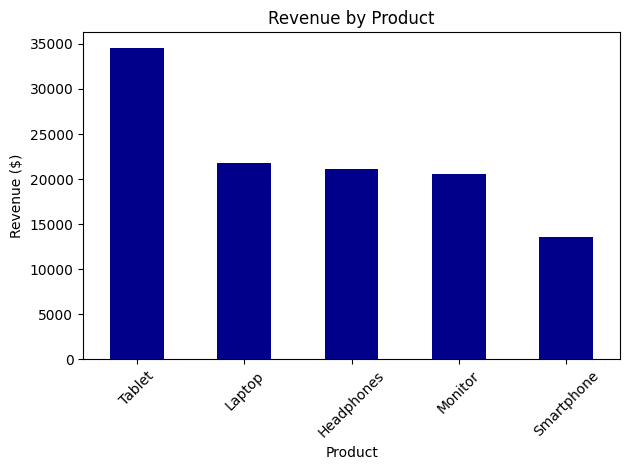

In [8]:
# Create bar plot
plt.figure(figsize=(12, 6))
ax = df.plot(kind='bar', x='product', y='revenue', color='darkblue', legend=False)

# Customize the plot
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('sales_chart.png')
plt.show()

# Close the database connection
conn.close()